# Set up 

In [1]:
import tellurium as te
import pandas as pd
import numpy as np
np.random.seed(SEED)

import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

import aesara.tensor as at
import aesara
floatX = aesara.config.floatX
import pymc as pm
import numpy as np

import cobra
import os

from scipy import stats
import scipy as sp
import math

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
os.chdir('../../..')
from src import antemll, util
import emll
from emll.aesara_utils import LeastSquaresSolve
os.chdir('notebooks/topologyA/fba_substitutions/')

In [3]:
Teusink_ant ='../../../models/Antimony/Simplified_Teusink_yeast.ant' 
r = te.loada(Teusink_ant)
r.conservedMoietyAnalysis = True
r.steadyState()

1.5710734600032811e-15

In [4]:
data_file01 = '../../../data/interim/generated_data/simplTeusink-noReg/fbaNoisy/SimplTeusink_fba-noise_pt0.1_sp4-max8.csv'
data_file02 = '../../../data/interim/generated_data/simplTeusink-noReg/fbaNoisy/SimplTeusink_fba-noise_pt0.2_sp4-max8.csv'
data_file03 = '../../../data/interim/generated_data/simplTeusink-noReg/fbaNoisy/SimplTeusink_fba-noise_pt0.3_sp4-max8.csv'
data_file04 = '../../../data/interim/generated_data/simplTeusink-noReg/fbaNoisy/SimplTeusink_fba-noise_pt0.4_sp4-max8.csv'

data_file05 = '../../../data/interim/generated_data/simplTeusink-noReg/fbaNoisy/SimplTeusink_fba-noise_pt0.5_sp4-max8.csv'
data_file10 = '../../../data/interim/generated_data/simplTeusink-noReg/fbaNoisy/SimplTeusink_fba-noise_pt1.01_sp4-max8.csv'
data_file15 = '../../../data/interim/generated_data/simplTeusink-noReg/fbaNoisy/SimplTeusink_fba-noise_pt1.5_sp4-max8.csv'
data_file3 = '../../../data/interim/generated_data/simplTeusink-noReg/fbaNoisy/SimplTeusink_fba-noise_pt3_sp4-max8.csv'
data_file5 = '../../../data/interim/generated_data/simplTeusink-noReg/fbaNoisy/SimplTeusink_fba-noise_pt5_sp4-max8.csv'
data_file7 = '../../../data/interim/generated_data/simplTeusink-noReg/fbaNoisy/SimplTeusink_fba-noise_pt7_sp4-max8.csv'
data_file100 = '../../../data/interim/generated_data/simplTeusink-noReg/fbaNoisy/SimplTeusink_fba-noise_pt10_sp4-max8.csv'


In [5]:
BMCA_obj01 = antemll.antemll(Teusink_ant, data_file01)
BMCA_obj02 = antemll.antemll(Teusink_ant, data_file02)
BMCA_obj03 = antemll.antemll(Teusink_ant, data_file03)
BMCA_obj04 = antemll.antemll(Teusink_ant, data_file04)
BMCA_obj05 = antemll.antemll(Teusink_ant, data_file05)
BMCA_obj10 = antemll.antemll(Teusink_ant, data_file10)
BMCA_obj15 = antemll.antemll(Teusink_ant, data_file15)
BMCA_obj3 = antemll.antemll(Teusink_ant, data_file3)
BMCA_obj5 = antemll.antemll(Teusink_ant, data_file5)
BMCA_obj7 = antemll.antemll(Teusink_ant, data_file7)
BMCA_obj100 = antemll.antemll(Teusink_ant, data_file100)


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_yeast_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_yeast_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_yeast_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_yeast_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_yeast_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_yeast_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_yeast_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_yeast_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_yeast_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_yeast_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/Simplified_Teusink_yeast_cobra.ant


In [6]:
def run_ADVI(BMCA_obj):
    with pm.Model() as pymc_model:
        
        # Initialize elasticities
        Ex_t = pm.Deterministic('Ex', util.initialize_elasticity(BMCA_obj.Ex.to_numpy(), name='Ex'))
        Ey_t = pm.Deterministic('Ey', util.initialize_elasticity(BMCA_obj.Ey.to_numpy(), name='Ey'))
        e_obs = pm.Normal('e_obs', mu=1, sigma=1, observed=BMCA_obj.en.T)
        chi_obs = pm.Normal('chi_obs', mu=0, sigma=10, observed=BMCA_obj.xn.T)
        y_obs = pm.Normal('y_obs', mu=0, sigma=10, observed=BMCA_obj.yn.T)
        likelihood = pm.Deterministic('vn', e_obs * (np.ones(BMCA_obj.en.T.shape) + pm.math.dot(Ex_t,chi_obs) + pm.math.dot(Ey_t,y_obs)))
        v_hat_obs = pm.Normal('v_hat_obs', mu=likelihood, sigma=0.1, observed=BMCA_obj.vn.squeeze().T)
    
        N_ITERATIONS = 45000
    
    with pymc_model:
        advi = pm.ADVI()
        tracker = pm.callbacks.Tracker(
            mean = advi.approx.mean.eval,
            std = advi.approx.std.eval
        )
        approx = advi.fit(
            n=       N_ITERATIONS, 
            callbacks = [tracker],
            obj_optimizer=pm.adagrad_window(learning_rate=5E-3), 
            total_grad_norm_constraint=0.7,
            obj_n_mc=1)
    
    with sns.plotting_context('notebook', font_scale=1.2):

        fig = plt.figure(figsize=(5,4))
        plt.plot(approx.hist + 30, '.', rasterized=True, ms=1)
        # plt.ylim([-1E1, 1E3])
        plt.xlim([0, N_ITERATIONS])
        sns.despine(trim=True, offset=10)

        plt.ylabel('-ELBO')
        plt.xlabel('Iteration')
        plt.title('in vitro ADVI convergence')
        plt.tight_layout()

    return approx.sample(draws=1000, random_seed=1)


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 2,981.1


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 1,884.7


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 1,466.6


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 1,120.4


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 3,158.9


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 920.63


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 981.09


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 1,333.1


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 2,228.5


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 3,693.4


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log

Finished [100%]: Average Loss = 6,138.1


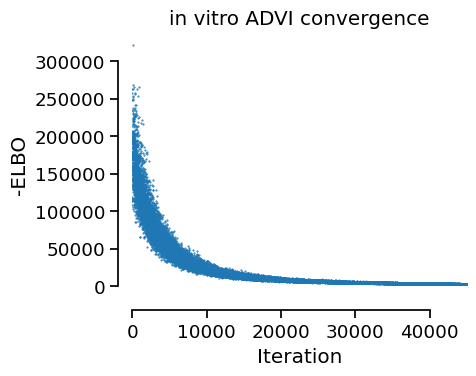

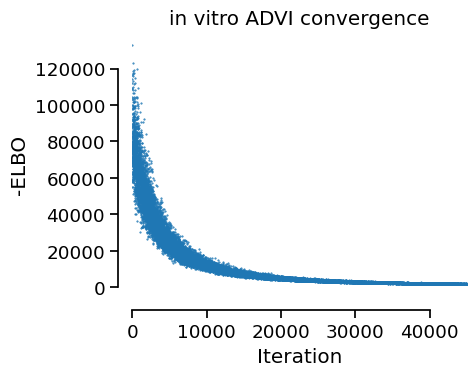

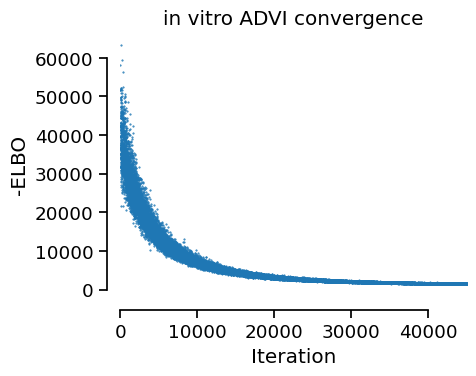

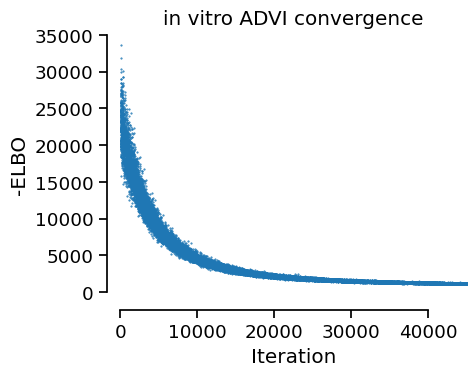

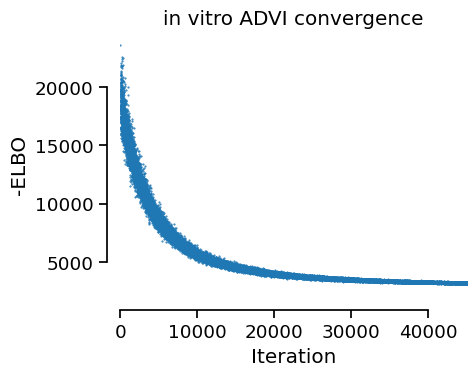

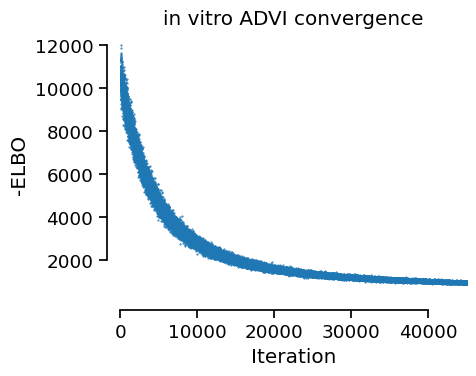

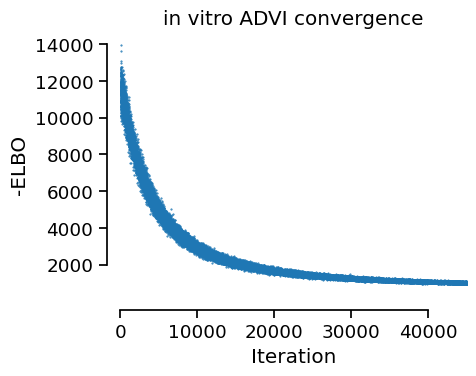

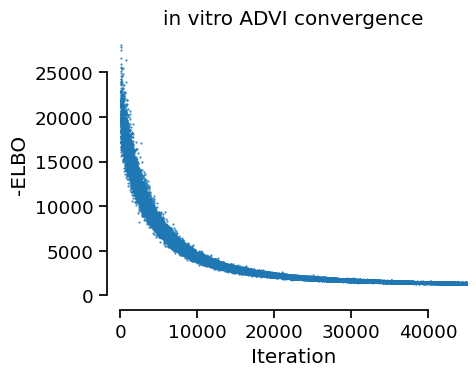

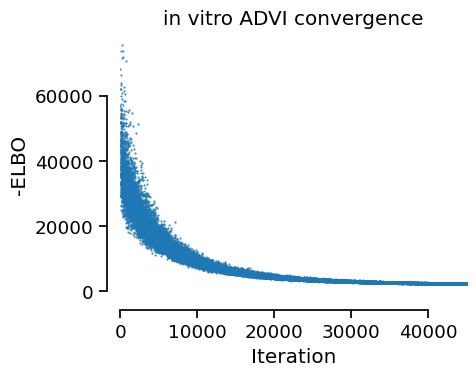

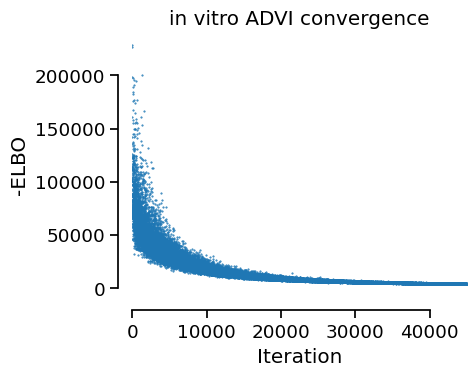

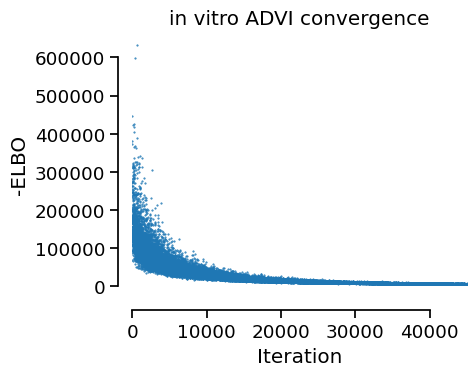

In [7]:
trace01 = run_ADVI(BMCA_obj01)
trace02 = run_ADVI(BMCA_obj02)
trace03 = run_ADVI(BMCA_obj03)
trace04 = run_ADVI(BMCA_obj04)
trace05 = run_ADVI(BMCA_obj05)
trace10 = run_ADVI(BMCA_obj10)
trace15 = run_ADVI(BMCA_obj15)
trace3 = run_ADVI(BMCA_obj3)
trace5 = run_ADVI(BMCA_obj5)
trace7 = run_ADVI(BMCA_obj7)
trace100 = run_ADVI(BMCA_obj100)

## Plotting ADVI results

In [8]:
def get_az_summary(t): 
    Ex_mean = az.summary(t)['mean'].reset_index()
    Ex_mean.columns = ['elasticity', 'mean']
    Ex_mean = Ex_mean[Ex_mean.elasticity.str.contains("Ex\[")]['mean'].values.flatten().reshape((-1,1))
    return np.mean(Ex_mean, axis=1)

In [9]:
Ex01_advi = get_az_summary(trace01)
Ex02_advi = get_az_summary(trace02)
Ex03_advi = get_az_summary(trace03)
Ex04_advi = get_az_summary(trace04)

Ex05_advi = get_az_summary(trace05)
Ex10_advi = get_az_summary(trace10)
Ex15_advi = get_az_summary(trace15)
Ex3_advi = get_az_summary(trace3)
Ex5_advi = get_az_summary(trace5)
Ex7_advi = get_az_summary(trace7)
Ex100_advi = get_az_summary(trace100)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: 

In [10]:
r.getScaledElasticityMatrix()

               G6P,      TRIO,      ACE,      P3G,       PEP,      GLCi,       F6P,       BPG,       PYR,     F16P,       P2G
vGLK   [[ -1.43765,         0,        0,        0,         0,   1.44964,         0,         0,         0,        0,         0],
vPGI    [  1.40347,         0,        0,        0,         0,         0, -0.953057,         0,         0,        0,         0],
vGLYCO  [        1,         0,        0,        0,         0,         0,         0,         0,         0,        0,         0],
vTreha  [        1,         0,        0,        0,         0,         0,         0,         0,         0,        0,         0],
vPFK    [        0,         0,        0,        0,         0,         0,   1.38303,         0,         0, -1.03688,         0],
vALD    [        0, -0.823896,        0,        0,         0,         0,         0,         0,         0,  1.10649,         0],
vGAPDH  [        0,  0.969712,        0,        0,         0,         0,         0, -0.705532,         0, 

## Calculating FCCs

In [11]:
gtFCC = pd.DataFrame(r.getScaledFluxControlCoefficientMatrix(), index=r.getReactionIds(), columns=r.getReactionIds())

In [12]:
def estimate_CCs(BMCA_obj, Ex):
    BMCA_obj.vn[BMCA_obj.vn == 0] = 1e-6
    
    a = np.diag(BMCA_obj.en.values / BMCA_obj.vn.values)
    a = np.diag(a)
    a = a[np.newaxis,:].repeat(1000, axis=0)

    Ex_ss = a @ Ex
    As = BMCA_obj.N @ np.diag(BMCA_obj.v_star) @ Ex_ss
    bs = BMCA_obj.N @ np.diag(BMCA_obj.v_star)
    bs = bs[np.newaxis, :].repeat(1000, axis=0)
    
    As = at.as_tensor_variable(As)
    bs = at.as_tensor_variable(bs)

    def solve_aesara(A, b):
        rsolve_op = LeastSquaresSolve()
        return rsolve_op(A, b).squeeze()

    CCC, _ = aesara.scan(lambda A, b: solve_aesara(A, b),
                        sequences=[As, bs], strict=True)

    identity = np.eye(len(BMCA_obj.N.T))
    identity = identity[np.newaxis,:].repeat(1000, axis=0)
    
    FCC = (Ex_ss @ CCC.eval()) + identity
    
    # return CCC.eval(), FCC
    return FCC


### Negative predictions

In [13]:
postFCC01 = estimate_CCs(BMCA_obj01, Ex01_advi.reshape((16,11)))
postFCC02 = estimate_CCs(BMCA_obj02, Ex02_advi.reshape((16,11)))
postFCC03 = estimate_CCs(BMCA_obj03, Ex03_advi.reshape((16,11)))
postFCC04 = estimate_CCs(BMCA_obj04, Ex04_advi.reshape((16,11)))

postFCC05 = estimate_CCs(BMCA_obj05, Ex05_advi.reshape((16,11)))
postFCC10 = estimate_CCs(BMCA_obj10, Ex10_advi.reshape((16,11)))
postFCC15 = estimate_CCs(BMCA_obj15, Ex15_advi.reshape((16,11)))
postFCC3 = estimate_CCs(BMCA_obj3, Ex3_advi.reshape((16,11)))
postFCC5 = estimate_CCs(BMCA_obj5, Ex5_advi.reshape((16,11)))
postFCC7 = estimate_CCs(BMCA_obj7, Ex7_advi.reshape((16,11)))
postFCC100 = estimate_CCs(BMCA_obj100, Ex100_advi.reshape((16,11)))

In [14]:
rxn_FCCs = [postFCC01, postFCC02, postFCC03, postFCC04, postFCC05, postFCC10, postFCC15, postFCC3, postFCC5, postFCC7, postFCC100]
pt_labels = ['0.1x', '0.2x', '0.3x', '0.4x','0.5x', '1.01x', '1.5x', '3x', '5x', '7x', '10x']

In [15]:
def append_FCC_df(postFCC, label):
    dfs=[]
    
    for idx, rxn in enumerate(r.getReactionIds()):
        # negativity applied here
        df = -pd.DataFrame(postFCC[:,idx,:], columns=r.getReactionIds())
        df['pt_rxn']=[rxn]*len(df)
        dfs.append(df)
    
    w = pd.concat(dfs)
    w['pt_str']=[label]*len(w)
    return w

prd_FCCs = pd.concat([append_FCC_df(rxn_FCCs[i], pt_labels[i]) for i in range(len(rxn_FCCs))])

In [16]:
medPrdFCCs = pd.pivot_table(prd_FCCs, index=['pt_rxn','pt_str'], aggfunc='median', sort=False)
# medPrdFCCs.loc['vGLK']
medPrdFCCs.head()

vGLK      vPGI    vGLYCO    vTreha      vPFK      vALD  \
pt_rxn pt_str                                                               
vGLK   0.1x   -1.752878  0.059462  0.001760  0.003519  0.175598  0.055584   
vPGI   0.1x    0.253401 -1.938938 -0.007052 -0.014104  0.180260  0.057098   
vGLYCO 0.1x    0.006956 -0.001715 -1.000079 -0.000158  0.003638  0.002143   
vTreha 0.1x    0.012996 -0.000194 -0.000251 -1.000502 -0.001453 -0.003072   
vPFK   0.1x    0.253401  0.061062 -0.007052 -0.014104 -1.819740  0.057098   

                 vGAPDH      vPGK      vPGM      vENO      vPYK      vPDC  \
pt_rxn pt_str                                                               
vGLK   0.1x    0.013311  0.003145  0.002050  0.001482  0.000319 -0.004998   
vPGI   0.1x    0.013644  0.003225  0.002135  0.001589  0.000438 -0.004990   
vGLYCO 0.1x    0.002012  0.000113 -0.000646 -0.001337 -0.003084 -0.004783   
vTreha 0.1x    0.000134  0.000190 -0.001392 -0.003152 -0.004686 -0.005554   
vPFK   0.1x    0.013644  0.003225  0.002135  0.001589  0.000438 -0.004990   

                   vSUC      vGLT      vADH    vG3PDH  
pt_rxn pt_str                                          
vGLK   0.1x   -0.026575  0.549088 -0.060304 -0.020563  
vPGI   0.1x   -0.027254  0.563385 -0.061846 -0.020991  
vGLYCO 0.1x   -0.000715  0.002168 -0.001622 -0.002891  
vTreha 0.1x   -0.001186  0.016080 -0.002690 -0.005268  
vPFK   0.1x   -0.027254  0.563385 -0.061846 -0.020991

### Graphing the averaged differences between ground truth and predicted distributions

C:\Users\user\AppData\Local\Temp\ipykernel_11128\2305547668.py:12: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



"\n    f2 = plt.figure(figsize=(16, 10))\n    relDifs.T.plot(kind='bar')\n    # alternate color each group of reactions so it is easier to see\n    for i in range(8):\n            plt.axvspan(2*i + 0.5, 2*i + 1.5, alpha=0.1)\n    plt.axhline(0, c='gray')\n    plt.ylim((-10,10))\n    plt.legend(loc='lower right')\n    plt.title(f'ADVI predictions for {rxn} FCCs given all data--relDifs')\n"

<Figure size 1600x1000 with 0 Axes>

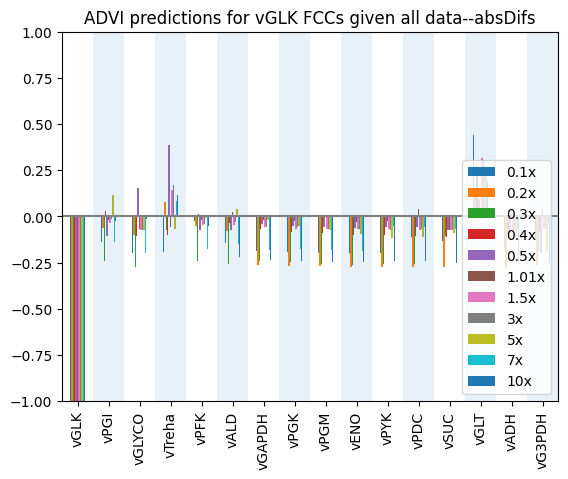

<Figure size 1600x1000 with 0 Axes>

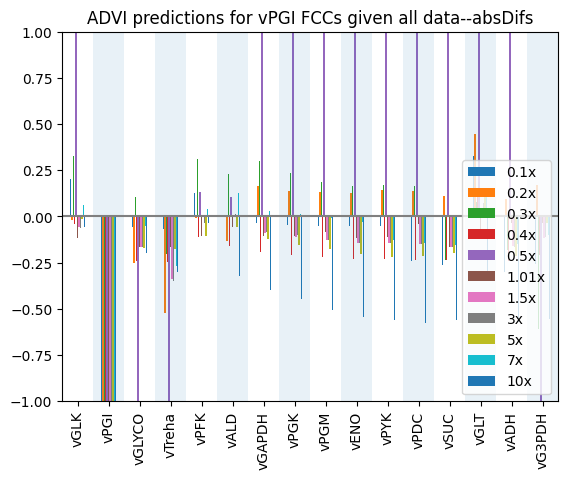

<Figure size 1600x1000 with 0 Axes>

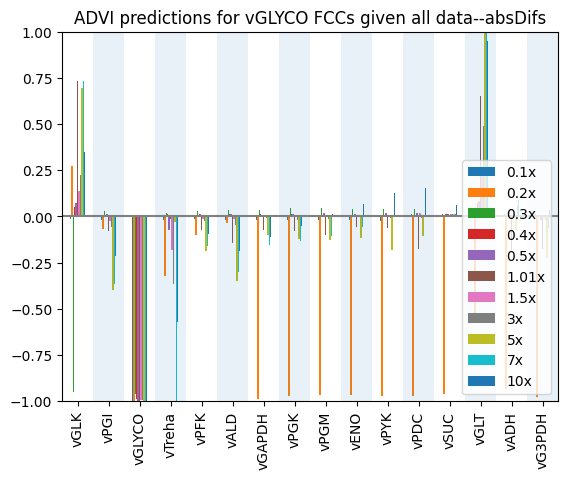

<Figure size 1600x1000 with 0 Axes>

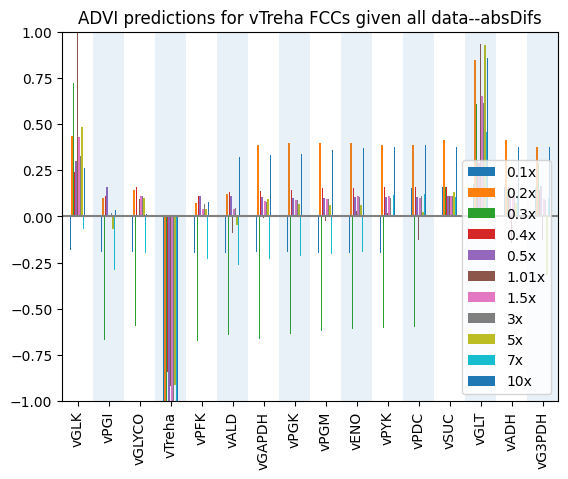

<Figure size 1600x1000 with 0 Axes>

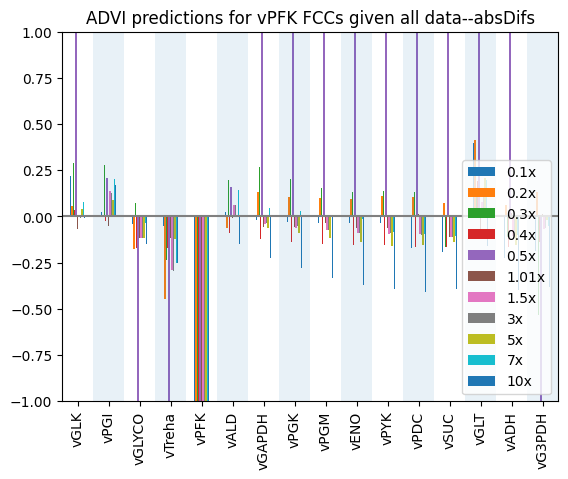

<Figure size 1600x1000 with 0 Axes>

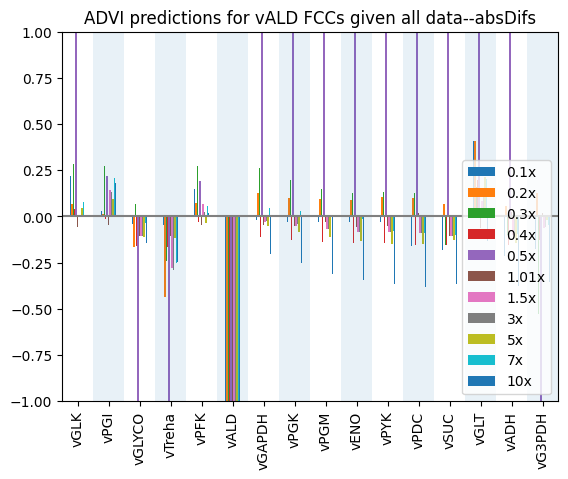

<Figure size 1600x1000 with 0 Axes>

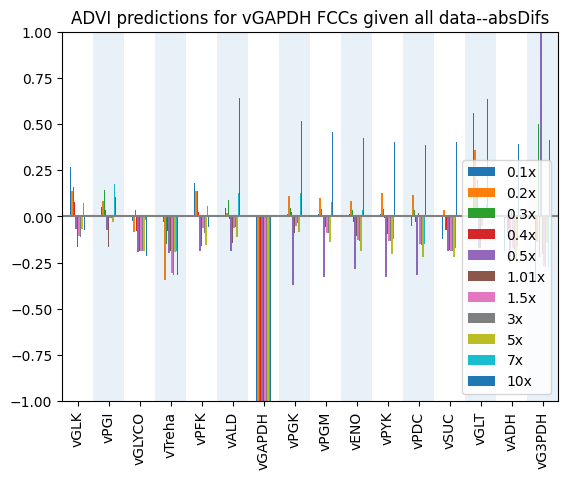

<Figure size 1600x1000 with 0 Axes>

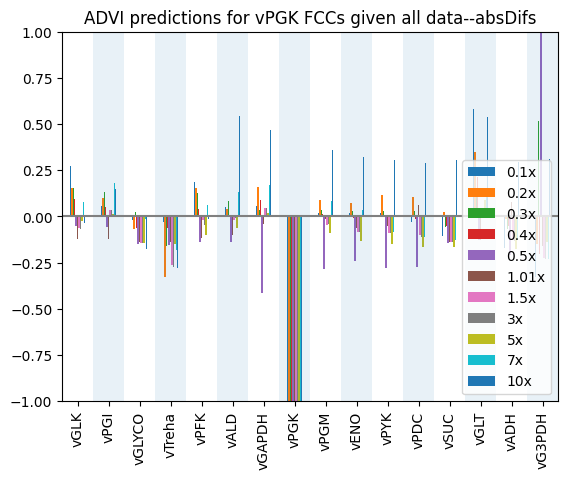

<Figure size 1600x1000 with 0 Axes>

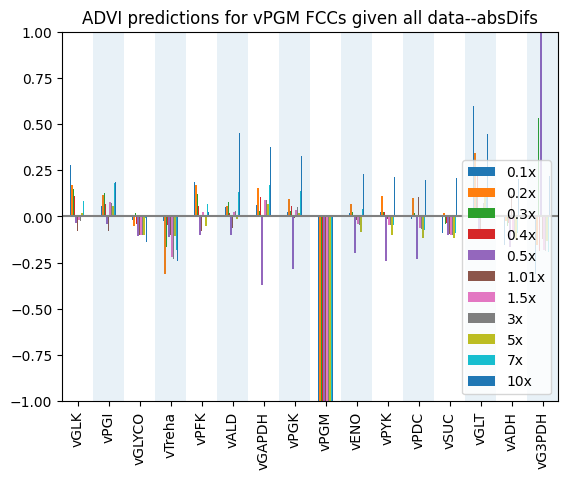

<Figure size 1600x1000 with 0 Axes>

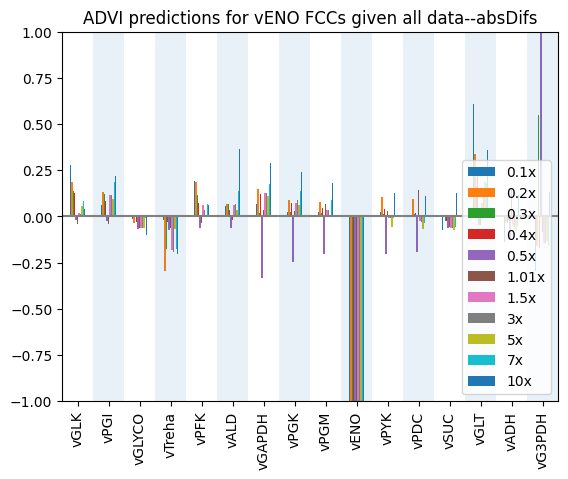

<Figure size 1600x1000 with 0 Axes>

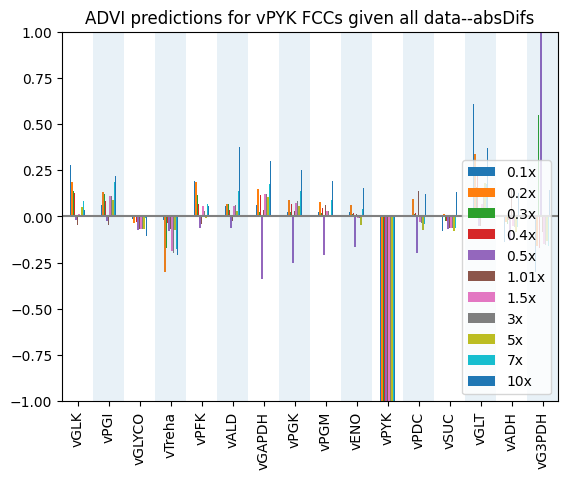

<Figure size 1600x1000 with 0 Axes>

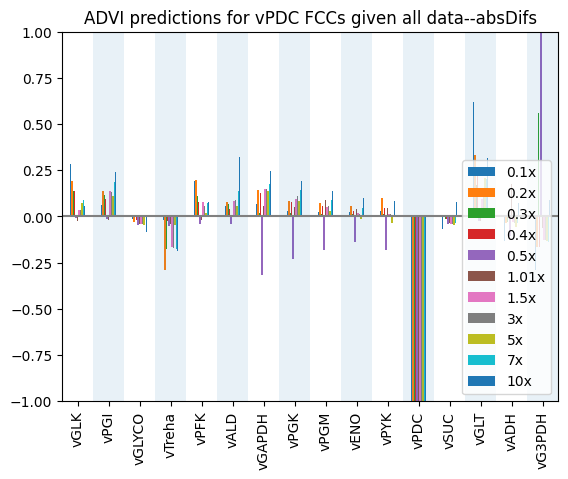

<Figure size 1600x1000 with 0 Axes>

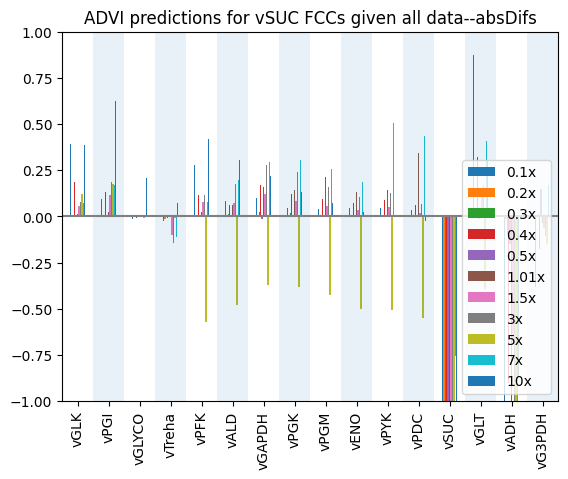

<Figure size 1600x1000 with 0 Axes>

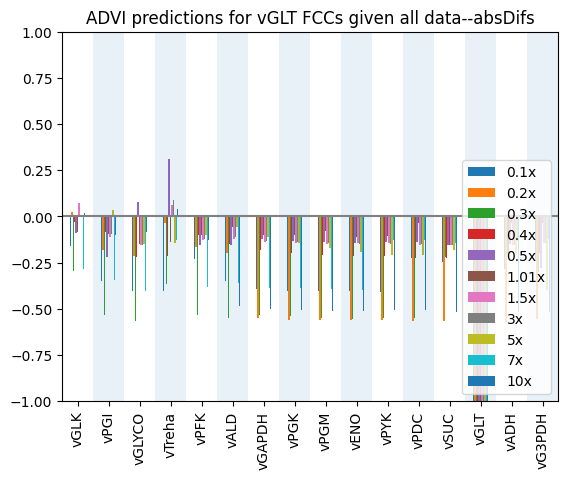

<Figure size 1600x1000 with 0 Axes>

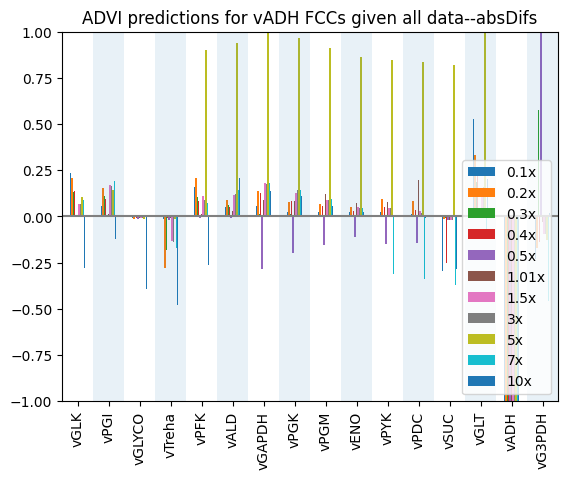

<Figure size 1600x1000 with 0 Axes>

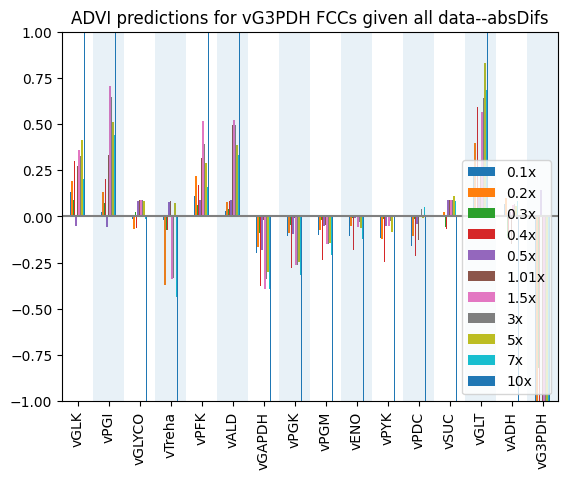

In [17]:
# for each reaction that can be perturbed
for rxn in r.getReactionIds():
    # locate the applicable rows in the medPrdFCCs df
    a = medPrdFCCs.loc[rxn]
    gtvals = np.repeat(gtFCC[rxn].values, repeats=len(pt_labels), axis=0).reshape((len(pt_labels), -1))
    # calculate the absolute difference...
    absDifs = a - gtvals
    # and the relative difference
    relDifs = absDifs/gtvals
    
    # plot both graphs 
    f1 = plt.figure(figsize=(16, 10))
    absDifs.T.plot(kind='bar')
    # alternate color each group of reactions so it is easier to see
    for i in range(8):
            plt.axvspan(2*i + 0.5, 2*i + 1.5, alpha=0.1)
    plt.axhline(0, c='gray')
    plt.ylim((-1,1))
    plt.legend(loc='lower right')
    plt.title(f'ADVI predictions for {rxn} FCCs given all data--absDifs')
"""
    f2 = plt.figure(figsize=(16, 10))
    relDifs.T.plot(kind='bar')
    # alternate color each group of reactions so it is easier to see
    for i in range(8):
            plt.axvspan(2*i + 0.5, 2*i + 1.5, alpha=0.1)
    plt.axhline(0, c='gray')
    plt.ylim((-10,10))
    plt.legend(loc='lower right')
    plt.title(f'ADVI predictions for {rxn} FCCs given all data--relDifs')
"""

In [18]:
plt.close("all")

## Evaluating FCC ranking

In [19]:
## ground truth FCC rankings for vADH

gtFCC=pd.DataFrame(r.getScaledFluxControlCoefficientMatrix(), columns=r.getReactionIds(), index=r.getReactionIds()).abs()
m1 = gtFCC.index.values[:, None] == gtFCC.columns.values
gtFCC = pd.DataFrame(np.select([m1], [float('Nan')], gtFCC), columns=gtFCC.columns, index=gtFCC.index)
gtFCC_rankings= gtFCC.rank(axis=1, ascending=False, na_option='keep')

a = gtFCC_rankings.loc['vADH']

### via Spearman rank coefficients

In [20]:
def calculate_FCC_med_rankings(postFCC, reaction='vADH'):
    postFCC_med=pd.DataFrame(np.median(postFCC, axis=0), columns=r.getReactionIds(), index=r.getReactionIds()).abs()
    m1 = postFCC_med.index.values[:, None] == postFCC_med.columns.values
    postFCC = pd.DataFrame(np.select([m1], [float('Nan')], postFCC_med), columns=postFCC_med.columns, index=postFCC_med.index)
    postFCC_rankings= postFCC.rank(axis=1, ascending=False, na_option='keep')
    
    return postFCC_rankings.loc[reaction]
    

In [29]:

spearman_coefficients = []
confidence_intervals = []
b_list = []
for FCC in rxn_FCCs:
    b = calculate_FCC_med_rankings(FCC)
    b_list.append(b)
    spearman_r = stats.spearmanr(a.dropna().values, b.dropna().values)
    spearman_coefficients.append(spearman_r)
    count = len(b_list[0])
    stderr = 1.0 / math.sqrt(count - 3)
    delta = 1.96 * stderr
    lower = math.tanh(math.atanh(spearman_r.correlation) - delta)
    upper = math.tanh(math.atanh(spearman_r.correlation) + delta)
    confidence_intervals.append((lower,upper))


In [30]:
spearman_df = pd.DataFrame([i.correlation for i in spearman_coefficients], columns=['r'], index=pt_labels)
spearman_df['p-value'] = [i.pvalue for i in spearman_coefficients]
spearman_df['lower'] = [i[0] for i in confidence_intervals]
spearman_df['upper'] = [i[1] for i in confidence_intervals]
spearman_df

r   p-value     lower     upper
0.1x   0.607143  0.016381  0.159406  0.847719
0.2x   0.303571  0.271356 -0.226178  0.694737
0.3x   0.439286  0.101361 -0.072135  0.767802
0.4x   0.650000  0.008712  0.227634  0.866511
0.5x  -0.082143  0.771029 -0.555246  0.431125
1.01x -0.125000  0.657136 -0.584495  0.395201
1.5x   0.653571  0.008230  0.233513  0.868050
3x     0.650000  0.008712  0.227634  0.866511
5x     0.571429  0.026063  0.105640  0.831583
7x     0.592857  0.019846  0.137576  0.841318
10x    0.785714  0.000516  0.475014  0.922229

In [31]:
spearman_df.to_csv('topologyA_noReg_fbaSub_spr.csv')

(0.0, 1.05)

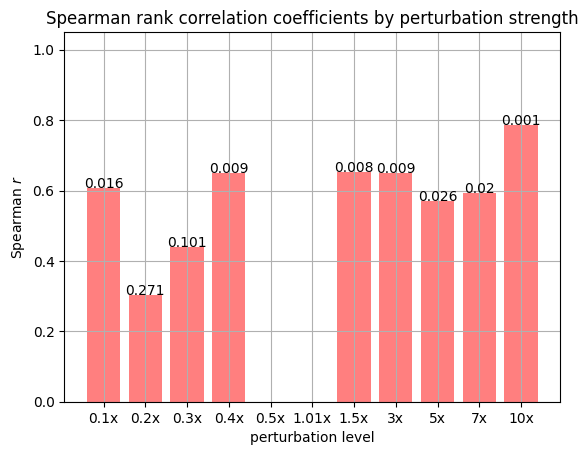

In [23]:
plt.bar(pt_labels, [i[0] for i in spearman_coefficients], alpha=0.5, color='r')
plt.grid()

for i, txt in enumerate([i[1].round(3) for i in spearman_coefficients]):
    plt.annotate(txt, (pt_labels[i], [i[0] for i in spearman_coefficients][i]), ha='center')

plt.title("Spearman rank correlation coefficients by perturbation strength")
plt.xlabel('perturbation level')
plt.ylabel('Spearman $\it{r}$')
plt.ylim((0, 1.05))

(-1.0, 1.05)

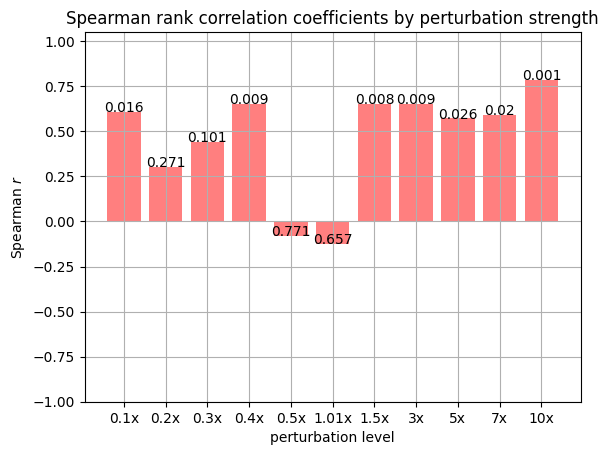

In [24]:
plt.bar(pt_labels, [i[0] for i in spearman_coefficients], alpha=0.5, color='r')
plt.grid()

for i, txt in enumerate([i[1].round(3) for i in spearman_coefficients]):
    plt.annotate(txt, (pt_labels[i], [i[0] for i in spearman_coefficients][i]), ha='center')

plt.title("Spearman rank correlation coefficients by perturbation strength")
plt.xlabel('perturbation level')
plt.ylabel('Spearman $\it{r}$')
plt.ylim((-1, 1.05))

### evaluating top five rankings

In [25]:
ranked_b_list = [b.sort_values().reset_index().set_index('vADH') for b in b_list]
q = pd.concat(ranked_b_list, axis=1)
q['gt'] = a.sort_values().reset_index().set_index('vADH')
q.columns = pt_labels + ['gt']
q = q[['gt'] + pt_labels]
q

gt    0.1x    0.2x    0.3x    0.4x    0.5x   1.01x    1.5x      3x  \
vADH                                                                           
1.0     vSUC    vGLT    vGLT  vG3PDH    vGLT  vG3PDH    vPDC  vGAPDH  vGAPDH   
2.0   vGAPDH    vSUC  vTreha    vGLT    vSUC  vGAPDH    vPGM    vPGI    vPGI   
3.0     vPGI    vGLK    vPFK  vTreha    vGLK    vPGK  vGAPDH    vPGK    vGLT   
4.0     vGLT  vG3PDH    vGLK    vGLK  vG3PDH    vPGM    vPGK    vGLT    vPGK   
5.0     vPGK    vPFK  vG3PDH    vPGI  vGAPDH    vPYK    vPYK    vALD  vTreha   
6.0     vPFK    vPGI    vPGI    vPFK    vPGI    vPDC    vENO  vTreha    vALD   
7.0   vTreha  vGAPDH  vGAPDH    vALD    vPFK    vENO    vALD    vPFK    vPGM   
8.0     vALD    vALD    vALD    vPGK    vPGK    vGLT    vPFK    vPGM    vPFK   
9.0     vPGM    vPGK    vPYK  vGAPDH    vPGM  vTreha  vG3PDH  vG3PDH  vG3PDH   
10.0  vG3PDH    vPYK    vPDC    vPGM    vALD    vSUC    vPGI    vGLK    vGLK   
11.0    vGLK    vPGM    vPGK    vSUC    vPYK  vGLYCO    vGLK    vENO    vENO   
12.0    vPYK    vENO    vPGM    vPYK    vPDC    vGLK    vGLT    vPYK    vPYK   
13.0    vENO    vPDC    vENO    vENO    vENO    vPFK    vSUC    vPDC    vPDC   
14.0    vPDC  vTreha    vSUC    vPDC  vTreha    vALD  vTreha    vSUC    vSUC   
15.0  vGLYCO  vGLYCO  vGLYCO  vGLYCO  vGLYCO    vPGI  vGLYCO  vGLYCO  vGLYCO   
NaN     vADH    vADH    vADH    vADH    vADH    vADH    vADH    vADH    vADH   

          5x      7x     10x  
vADH                          
1.0     vGLT    vGLT    vSUC  
2.0   vGAPDH    vPGI    vPGI  
3.0     vPGI  vGAPDH    vALD  
4.0     vPGK  vTreha    vGLT  
5.0   vG3PDH    vPGK  vTreha  
6.0     vGLK    vALD  vGAPDH  
7.0     vALD  vG3PDH    vPFK  
8.0     vPGM    vPGM    vPGK  
9.0     vPFK    vGLK    vGLK  
10.0    vENO    vPFK  vGLYCO  
11.0    vPYK    vENO    vPGM  
12.0    vSUC    vPYK    vPDC  
13.0  vTreha    vPDC    vPYK  
14.0  vGLYCO    vSUC    vENO  
15.0    vPDC  vGLYCO  vG3PDH  
NaN     vADH    vADH    vADH

In [26]:
q.to_csv('simplTeusink_rankings.csv')